# N-Asset Efficient Frontier

In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import edhec_risk_kit as erk
import numpy as np
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'],12)
cov = ind['1996':'2000'].cov()

In [38]:

def plot_ef(n_points, er, cov, style = ".-"):
    """
    Plots the 2-asset efficient frontier
    """
    weights = minimize_vol(target_return)???
    rets = [portfolio_ret(w,er) for w in weights]
    vols = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x = "Volatility", y = "Returns", style = style)


SyntaxError: invalid syntax (<ipython-input-38-37ebc1ddd15d>, line 5)

In [39]:
from scipy.optimize import minimize

<AxesSubplot:xlabel='Volatility'>

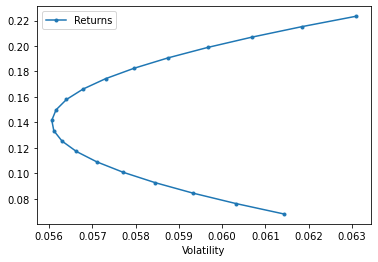

In [40]:
l = ['Games', 'Fin']
erk.plot_ef2(20,er[l],cov.loc[l,l])

In [41]:
import numpy as np

def minimize_vol(target_return, er, cov):
    """
    target_return -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n , n)
    bounds = ((0.0, 1.0),) * n
    return_is_target = {
        "type": "eq",
        "args": (er,),
        "fun": lambda weights, er: target_return - erk.portfolio_ret(weights, er)
    }
    weights_sum_to_1 = {
        "type": "eq",
        "fun": lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol,
                      init_guess,
                      args = (cov,),
                      method = "SLSQP",
                      options = {'disp': False},
                      constraints=(return_is_target, weights_sum_to_1),
                      bounds = bounds
                      )
    return results.x

In [42]:
l

['Games', 'Fin']

In [43]:
# test
w15 = erk.minimize_vol(0.15,er[l],cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [44]:
w15

array([0.47287631, 0.52712369])

In [45]:
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on the minimize the vol
    """
    targer_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(targer_return,er,cov) for targer_return in targer_rs]
    return weights

def plot_ef(n_points, er, cov, style = ".-"):
    """
    Plots the 2-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_ret(w,er) for w in weights]
    vols = [erk.portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x = "Volatility", y = "Returns", style = style)


<AxesSubplot:xlabel='Volatility'>

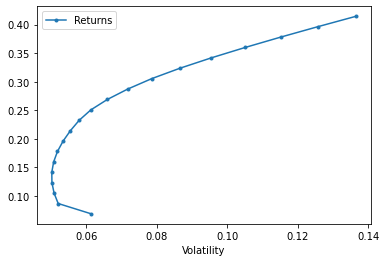

In [53]:
l = ['Fin', 'Smoke', 'Games', 'Coal']
plot_ef(20,er[l],cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

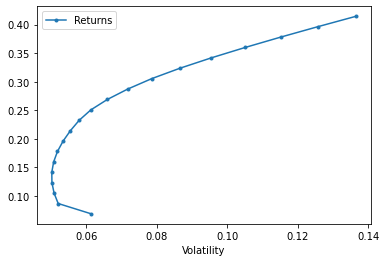

In [54]:
l = ['Fin', 'Smoke', 'Games', 'Coal']
erk.plot_ef(20,er[l],cov.loc[l,l])